# Depth Map Generation

<a target="_blank" href="https://colab.research.google.com/github/simonguest/CS-394/blob/main/src/04/notebooks/generate-depth-map.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
<a target="_blank" href="https://github.com/simonguest/CS-394/raw/refs/heads/main/src/04/notebooks/generate-depth-map.ipynb">
  <img src="https://img.shields.io/badge/Download_.ipynb-blue" alt="Download .ipynb"/>
</a>

## Install Dependencies

In [1]:
!uv pip install replicate -q

## Set Replicate API Token

In [ ]:
import sys
import os
from dotenv import load_dotenv

if 'google.colab' in sys.modules:
  from google.colab import userdata # type:ignore
  os.environ['REPLICATE_API_TOKEN'] = userdata.get('REPLICATE_API_TOKEN')
  print("Replicate API Token set for Colab")
else:
  load_dotenv()
  print("Loaded env vars from .env")

## Input Image

In [ ]:
from IPython.display import Image

INPUT_IMAGE = "https://raw.githubusercontent.com/simonguest/CS-394/refs/heads/main/src/04/images/campus.png"

Image(url=INPUT_IMAGE)


## Image-to-Image using depth-anything-v2

In [ ]:
import replicate

MODEL = "chenxwh/depth-anything-v2:b239ea33cff32bb7abb5db39ffe9a09c14cbc2894331d1ef66fe096eed88ebd4"

output = replicate.run(
  MODEL,
  input={
      "image": INPUT_IMAGE,
  },
)

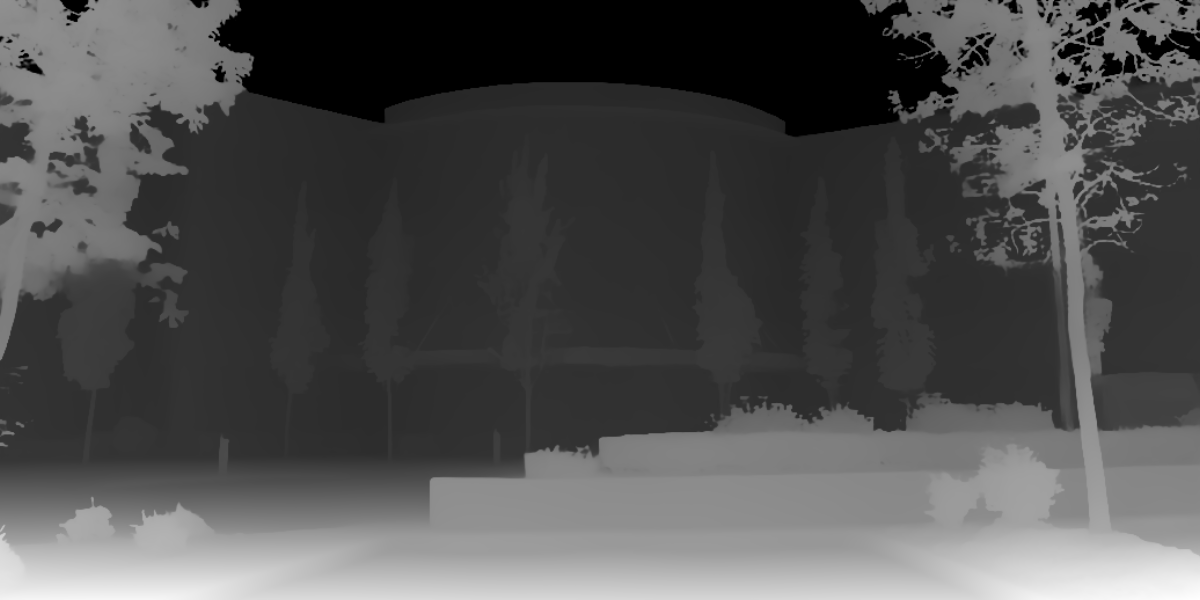

In [ ]:
import io
from PIL import Image

output_bytes = io.BytesIO(output["grey_depth"].read())
output_image = Image.open(output_bytes)
output_image